### **<center>Factor Analysis</center>**

1. import data
2. PCA with no rotation
3. choose the number of factors
4. PCA W/ varimax rotation** (4 factors)
5. Analysis


In [25]:
# 1. import packages and data

#!pip install factor_analyzer
import pandas as pd
import numpy as np

import factor_analyzer
import matplotlib.pyplot as plt

survqs = pd.read_csv('dupont_data.csv').iloc[:,6:25]

In [30]:
# 2. PCA with no rotation
dupont_pca = factor_analyzer.FactorAnalyzer(n_factors=survqs.shape[1],
                                            rotation=None,
                                          method='principal').fit(survqs)

Text(0, 0.5, 'Variance')

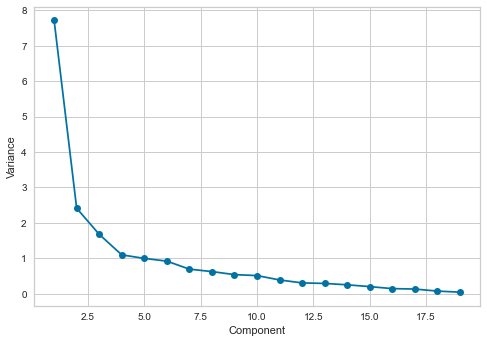

In [31]:
# 3. Choose the Number of Factora
plt.plot(1+np.arange(len(dupont_pca.get_factor_variance()[0])),
         dupont_pca.get_factor_variance()[0],'o-')
plt.xlabel('Component')
plt.ylabel('Variance')

In [32]:
def get_summary(pca,round_dig=2):
    return pd.DataFrame(
      [pca.get_factor_variance()[0],
       pca.get_factor_variance()[1],
       pca.get_factor_variance()[2]],
       columns=['PC{}'.format(i) for i in
                range(1,1+len(pca.get_factor_variance()[0]))],
      index=['Sum of Squared Loadings','Proportion of Variance Explained',
             'Cumulative Proportion']
            ).round(round_dig)

get_summary(dupont_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Sum of Squared Loadings,7.71,2.41,1.68,1.10,1.00,0.92,0.69,0.62,0.54,0.51,0.39,0.30,0.29,0.25,0.20,0.14,0.13,0.07,0.04
Proportion of Variance Explained,0.41,0.13,0.09,0.06,0.05,0.05,0.04,0.03,0.03,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.00,0.00
Cumulative Proportion,0.41,0.53,0.62,0.68,0.73,0.78,0.82,0.85,0.88,0.90,0.92,0.94,0.96,0.97,0.98,0.99,0.99,1.00,1.00


In [33]:
# 4. PCA W/ Varimax Rotation** (4 factors)
dupont_pca_rotated = factor_analyzer.FactorAnalyzer(n_factors=4,
                                                    rotation='varimax',
                                          method='principal').fit(survqs)

In [34]:
# 5 Analysis
def get_loadings_communalities(pca,round_dig=2,index_names=None):
    df = pd.DataFrame(
      pca.loadings_,
      index=index_names if index_names else [f'q{i}' for i in range(1,1+pca.loadings_.shape[0])],
      columns=[f'RC{i}' for i in range(1,1+pca.loadings_.shape[1])] 
        if pca.rotation 
        else [f'PC{i}' for i in range(1,1+pca.loadings_.shape[1])]
      )
    if pca.rotation:
    df['communalities']=pca.get_communalities()
    df=df.round(3)
    return  df

get_loadings_communalities(dupont_pca_rotated,index_names=list(survqs.columns))

,RC1,RC2,RC3,RC4,communalities
Q1,0.336,0.299,0.596,-0.000,0.558
Q2,0.185,0.772,0.101,0.261,0.709
Q3,0.104,0.758,0.127,0.327,0.709
Q4,-0.061,0.837,0.158,-0.027,0.729
TS1,0.628,0.278,0.364,0.383,0.751
TS2,0.353,0.198,0.348,0.692,0.763
TS3,0.280,0.195,0.146,0.819,0.808
SM1,0.765,0.090,0.124,0.172,0.638
SM2,0.676,-0.000,0.373,0.408,0.763
SD1,0.210,-0.027,0.733,0.272,0.656


From here, we can further cluster the data, and analysis each cluster by their score in factors.